## Transformata Hougha w przestrzeni _ab_ - zadanie domowe
Przestrzeń ρ, θ nie jest jedyną przestrzenią, w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:
$$
    y=ax+b.
$$
W tej przestrzeni reprezentacją pęku prostych jest prosta.

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:
- aMin - minimalna wartość parametru _a_,
- aMax - maksymalna  wartość parametru _a_,
- aSkok - skok parametru _a_,
- bMin - minimalna wartość parametru _b_,
- bMax  - maksymalna  wartość parametru _b_,
- bSkok - skok parametru _b_.

Jako wynik ma zwrócić macierz przestrzeni Hougha _ab_.

Uwagi:
- zadanie może wyglądać na skomplikowane, ale tak naprawdę wymaga tylko starannego przemyślenia,
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami, jakie parametry a i b mogą przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję `np.arange`,
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja `np.zeros`),
- dla każdego punktu krawędzi na obrazie należy:
    - używając wektora A dla każdej z jego wartości a, obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (**a_idx**) będą jedną ze współrzędnych macierzy H, natomiast drugą współrzędną można uzyskać jako `b_idx = np.argmin(abs(B - b))`,
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować.
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5,
    - aMax:  5,
    - aSkok: 0.05,
    - bMin: -100,
    - bMax:  100,
    - bSkok: 1.

Zastanów się, w przypadku jakich prostych reprezentacja _ab_ nie sprawdzi się.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'
fileNames = ["dom.png", "kwadraty.png", "lab112.png"]

for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, 'wb').write(r.content)

In [2]:
# funkcja opisana w poleceniu
def hough_ab(image, aMin, aMax, aStep, bMin, bMax, bStep):
    aVec = np.arange(aMin, aMax + aStep / 2, aStep)
    bVec = np.arange(bMin, bMax + bStep / 2, bStep)
    aShape = aVec.shape[0]
    bShape = bVec.shape[0]
    H = np.zeros((aShape, bShape))

    for y, row in enumerate(image):
        for x, cell in enumerate(row):
            if image[y, x] > 0: # przyjmuję, że dostaję "obraz krawędziowy"
                for a_idx, a in enumerate(aVec):
                    b = y - a * x
                    b_idx = np.argmin(np.abs(bVec - b))
                    H[a_idx, b_idx] += 1

    return H

In [3]:
# zmodyfikowana funkcja z podstawowej części laboratorium
def show_hough_ab(h, image):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel("'a' idxs")
    ax[1].set_ylabel("'b' idxs")
    ax[1].axis('image')

    plt.tight_layout()
    plt.show()

In [4]:
# proponowane wartości parametrów
aMin = -5
aMax = 5
aStep = 0.05
bMin = -100
bMax = 100
bStep = 1

### Eksperymenty dla małej liczby punktów

(-0.5, 63.5, 63.5, -0.5)

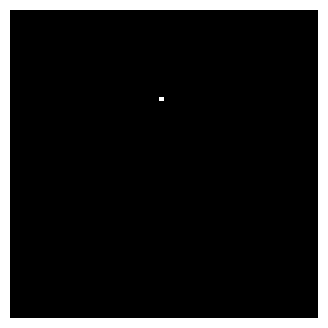

In [5]:
# sztuczny obraz
im = np.zeros((64, 64), dtype=np.uint8)

# wybrany przykładowy punkt
im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')

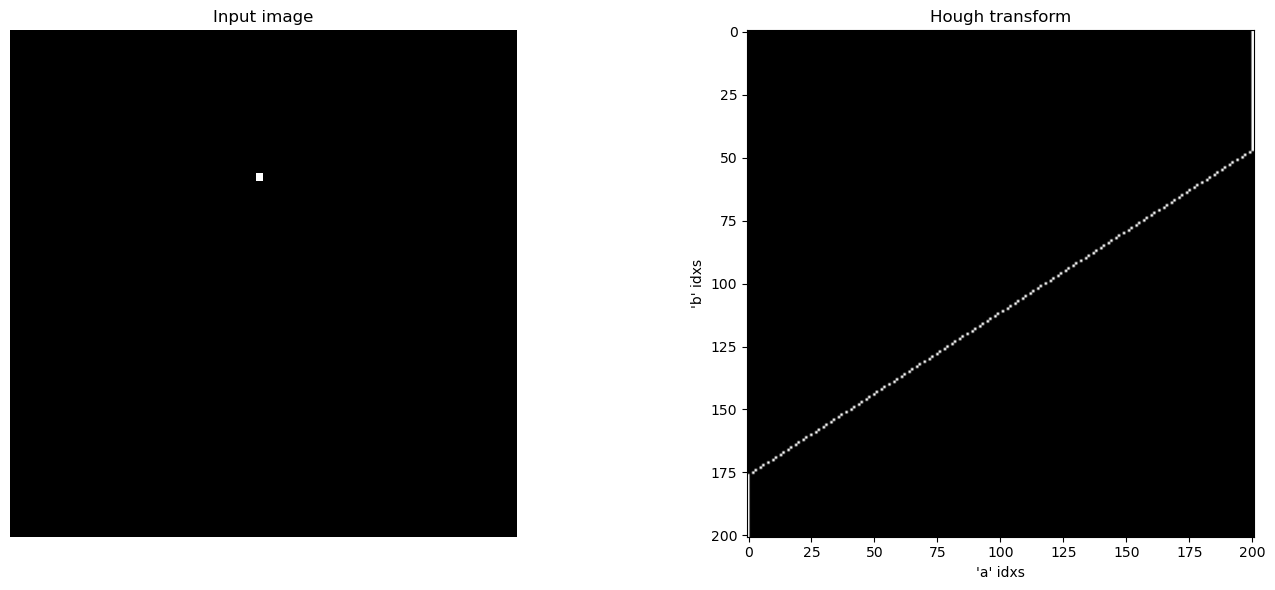

In [6]:
# transformata Hougha obrazu im 
H = hough_ab(im, aMin, aMax, aStep, bMin, bMax, bStep)

# wyświetlmy wyniki
show_hough_ab(H, im)

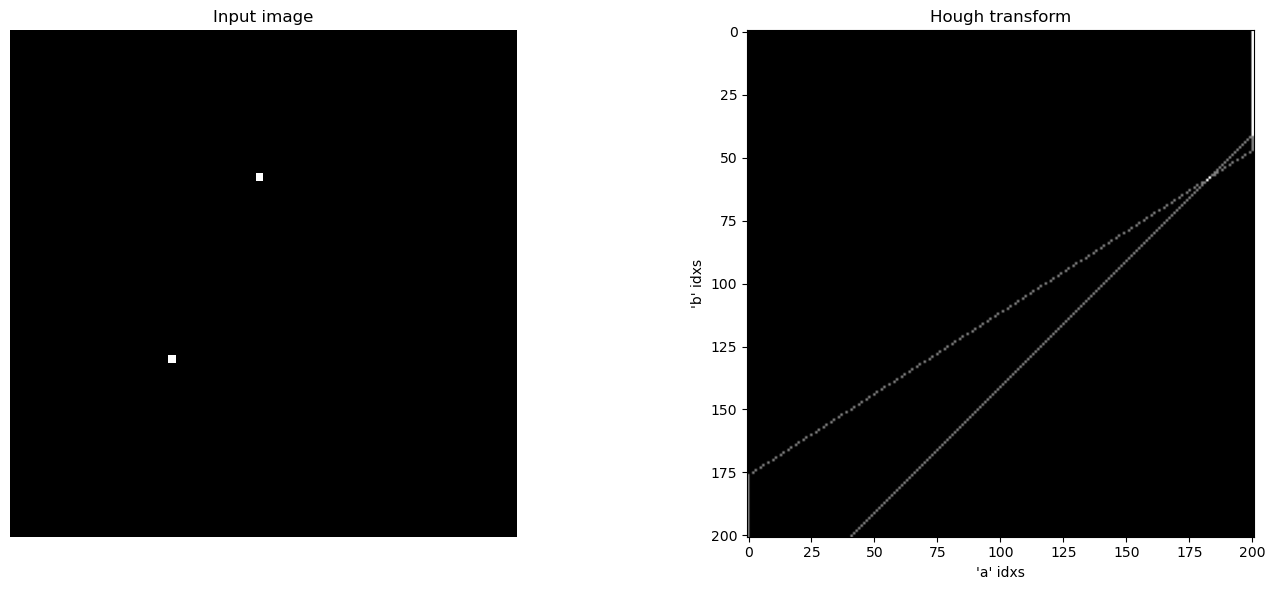

In [7]:
# dodatkowy punkt, zaznaczony razem z wcześniejszym
im[41, 20] = 1

H = hough_ab(im, aMin, aMax, aStep, bMin, bMax, bStep)
show_hough_ab(H, im)

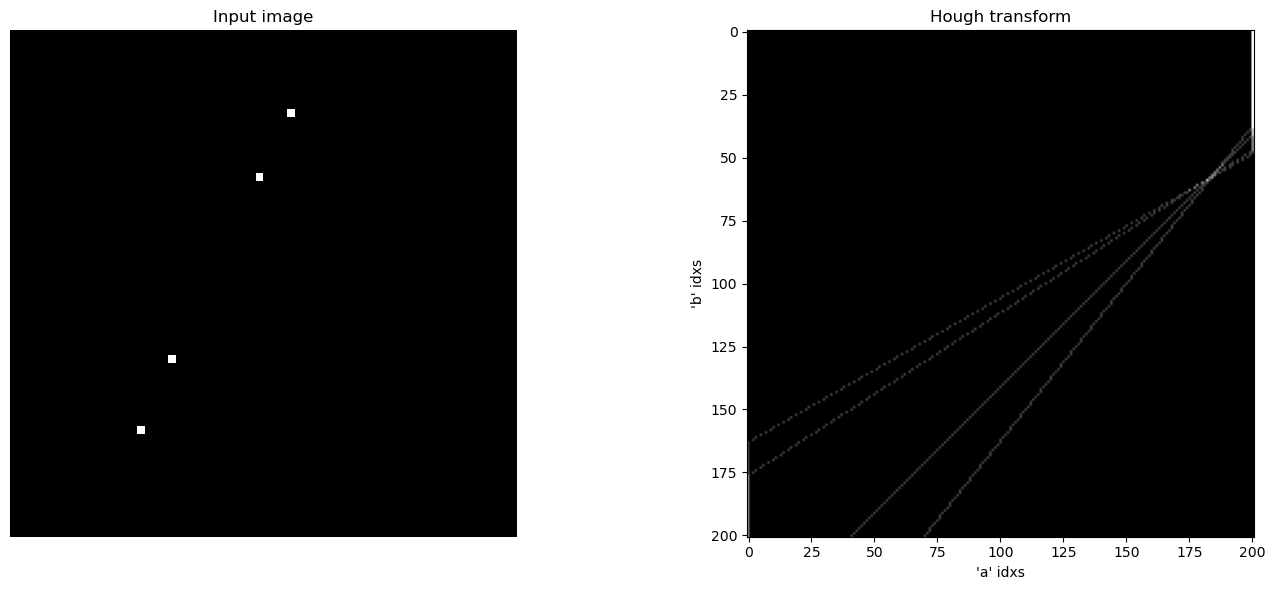

In [8]:
# dodatkowe punkty, dobrane tak, aby punkty były współliniowe
im[10, 35] = 1
im[50, 16] = 1

H = hough_ab(im, aMin, aMax, aStep, bMin, bMax, bStep)
show_hough_ab(H, im)

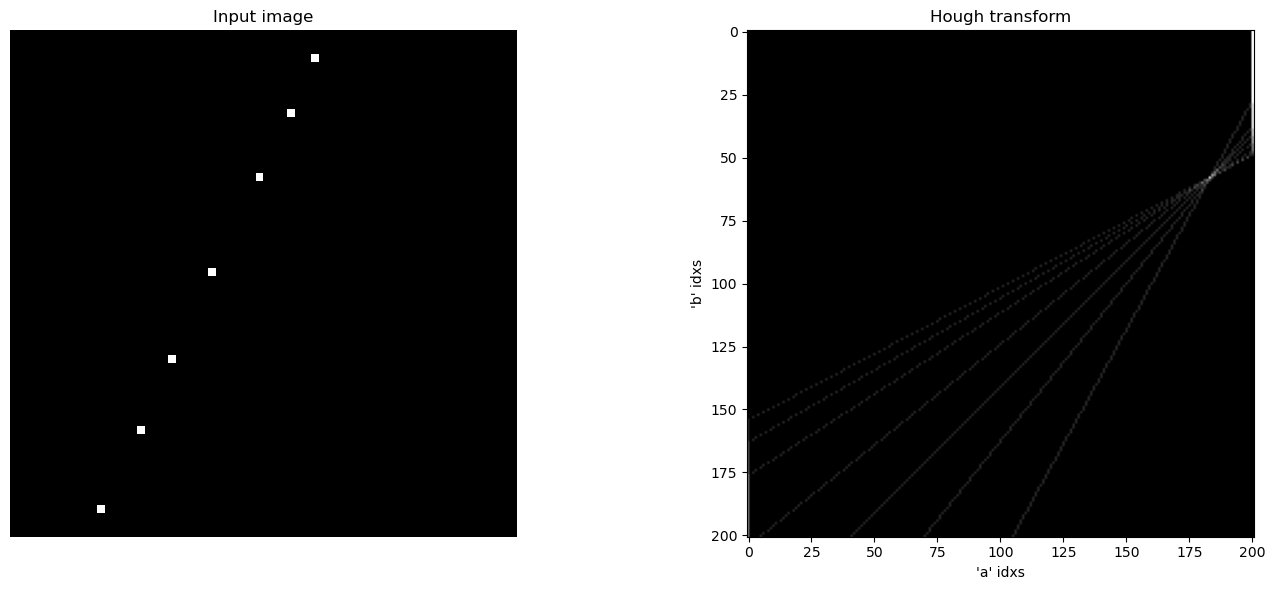

In [9]:
# coraz bliżej linii
im[3, 38] = 1
im[30, 25] = 1
im[60, 11] = 1

H = hough_ab(im, aMin, aMax, aStep, bMin, bMax, bStep)
show_hough_ab(H, im)

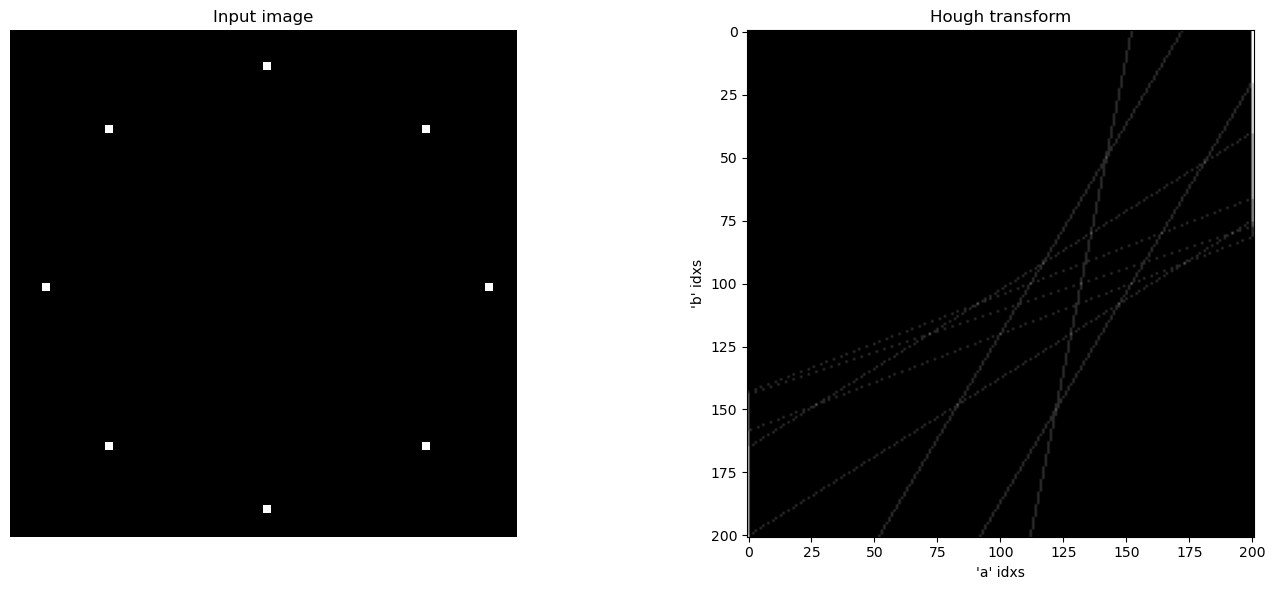

In [10]:
# rozłożenie na okręgu
im = np.zeros((64, 64), dtype=np.uint8)
im[4, 32] = 1
im[12, 52] = 1
im[32, 60] = 1
im[52, 52] = 1
im[60, 32] = 1
im[52, 12] = 1
im[32, 4] = 1
im[12, 12] = 1

H = hough_ab(im, aMin, aMax, aStep, bMin, bMax, bStep)
show_hough_ab(H, im)

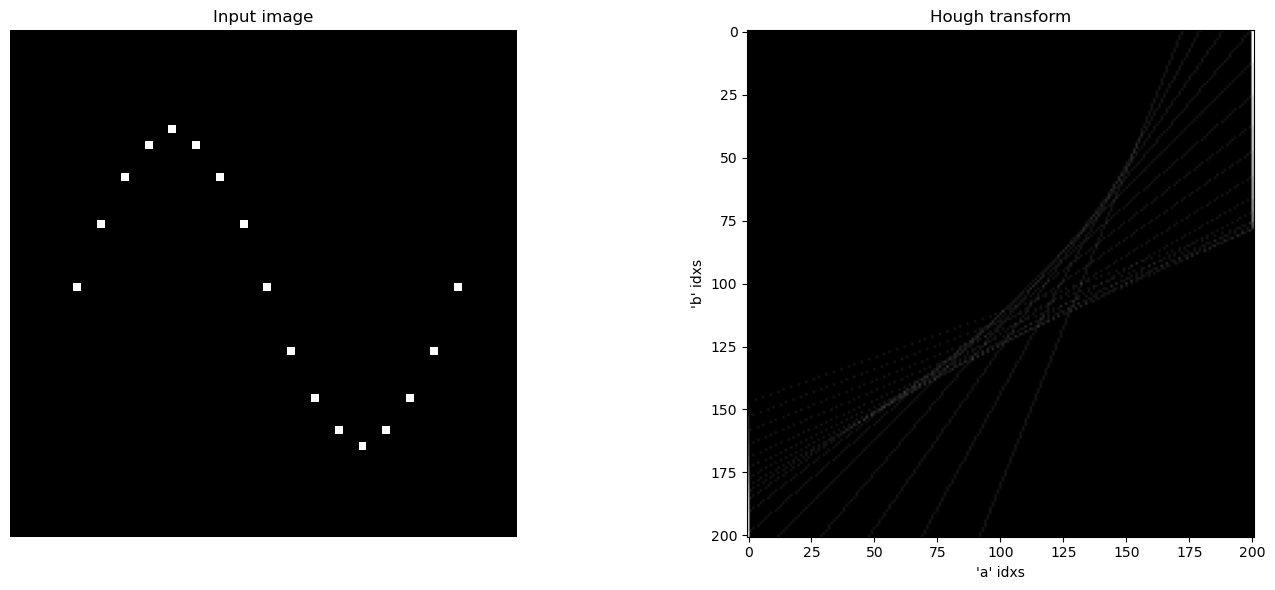

In [11]:
# sinusoida
im = np.zeros((64, 64), dtype=np.uint8)
im[32, 8] = 1
im[24, 11] = 1
im[18, 14] = 1
im[14, 17] = 1
im[12, 20] = 1
im[14, 23] = 1
im[18, 26] = 1
im[24, 29] = 1
im[32, 32] = 1
im[40, 35] = 1
im[46, 38] = 1
im[50, 41] = 1
im[52, 44] = 1
im[50, 47] = 1
im[46, 50] = 1
im[40, 53] = 1
im[32, 56] = 1

H = hough_ab(im, aMin, aMax, aStep, bMin, bMax, bStep)
show_hough_ab(H, im)

### Eksperymenty dla obrazu _kwadraty_

(-0.5, 255.5, 255.5, -0.5)

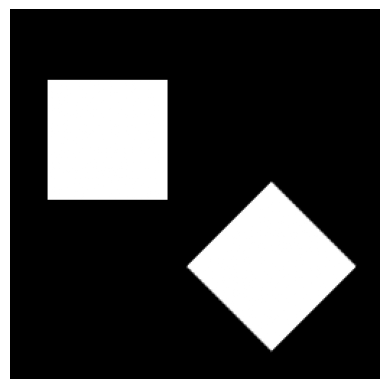

In [12]:
# wczytanie obrazu
kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(kwadraty, 'gray', vmin=0, vmax=256)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

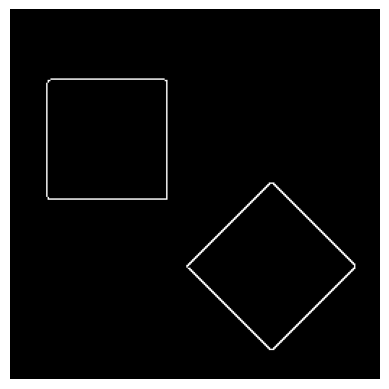

In [13]:
# detekcja krawędzi
kwadratyBlur = cv2.GaussianBlur(kwadraty, (3, 3), 0.5)
kwadratyEdges = cv2.Canny(kwadratyBlur, 100, 200, None, 3, 1)

# wyświetlmy obraz po detekcji krawędzi
plt.imshow(kwadratyEdges, 'gray')
plt.axis('off')

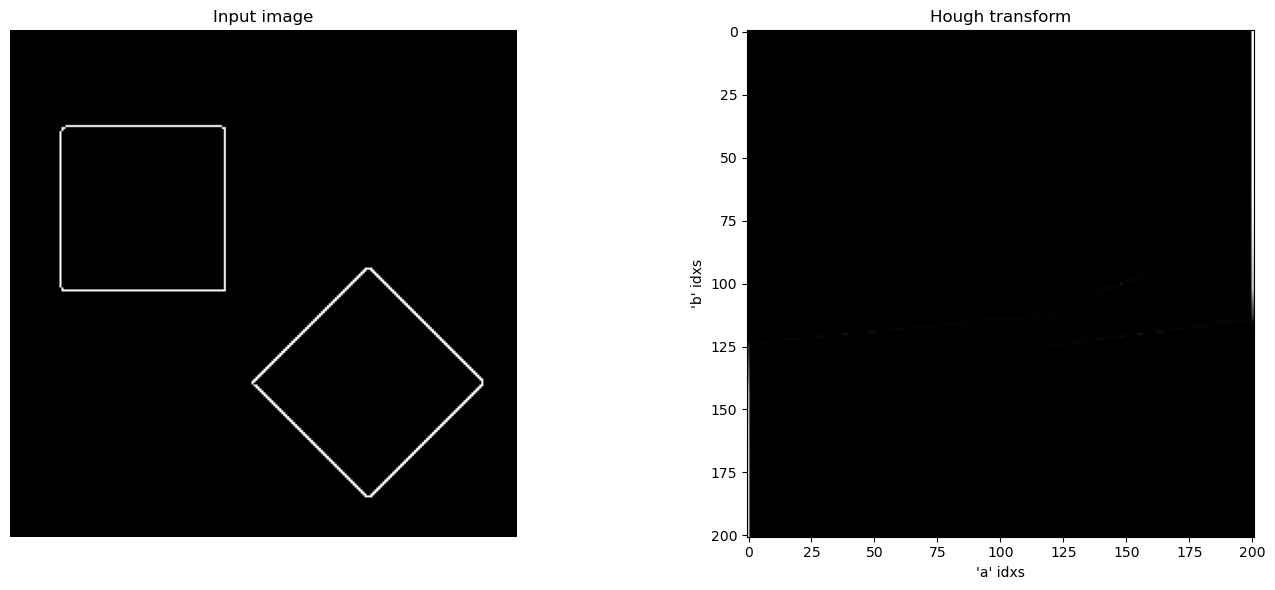

In [14]:
# transformata Hougha obrazu
H = hough_ab(kwadratyEdges, aMin, aMax, aStep, bMin, bMax, bStep)

# wyświetlmy wyniki
show_hough_ab(H, kwadratyEdges)

### Eksperymenty dla obrazu _lab112_

(-0.5, 639.5, 479.5, -0.5)

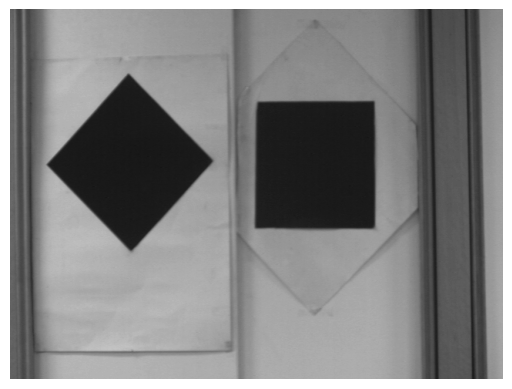

In [15]:
# wczytanie obrazu
lab112 = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(lab112, 'gray', vmin=0, vmax=256)
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

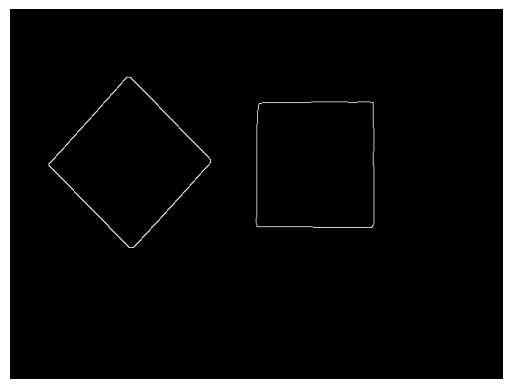

In [16]:
# przekształcenia obrazu potrzebne do detekcji krawędzi
_, lab112Bin = cv2.threshold(lab112, 40, 255, cv2.THRESH_BINARY_INV)
lab112BinOpen = cv2.morphologyEx(src=lab112Bin, op=cv2.MORPH_OPEN, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1)))
lab112BinOpenBlur = cv2.GaussianBlur(lab112BinOpen, (7, 7), 1.25)
lab112Edges = cv2.Canny(lab112BinOpenBlur, 100, 200, None, 3, 1)

# wyświetlmy finalny efekt
plt.imshow(lab112Edges, 'gray')
plt.axis('off')

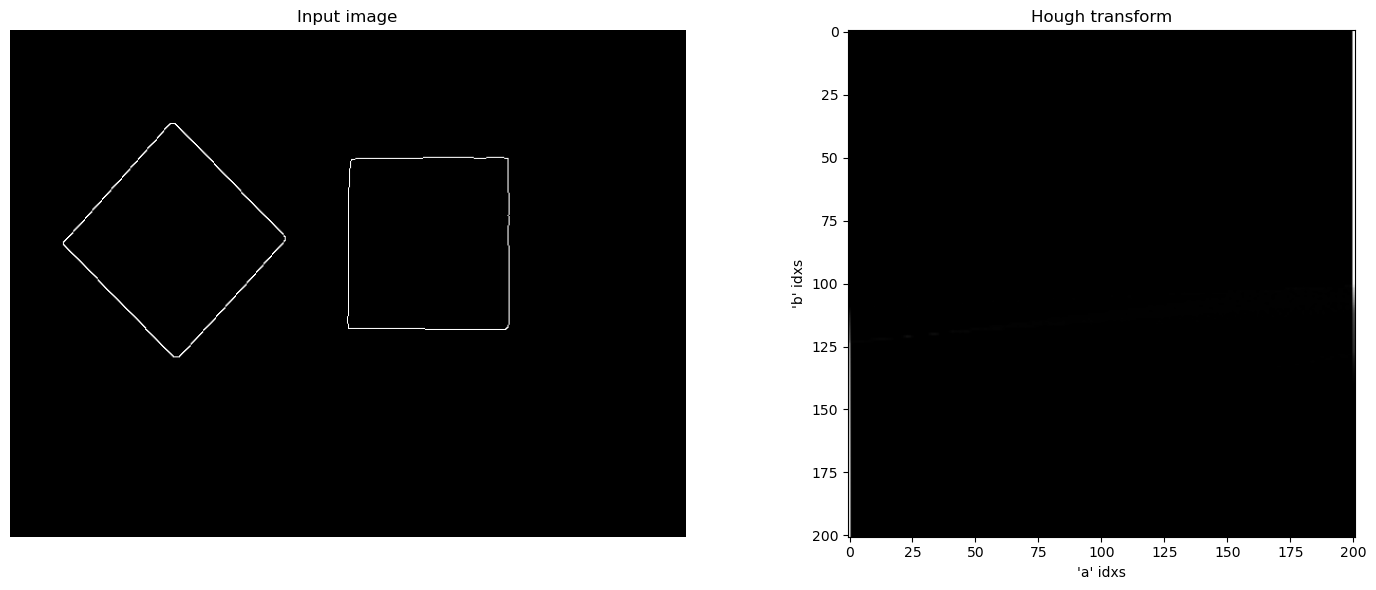

In [17]:
# transformata Hougha obrazu
H = hough_ab(lab112Edges, aMin, aMax, aStep, bMin, bMax, bStep)

# wyświetlmy wyniki
show_hough_ab(H, lab112Edges)

### Eksperymenty dla obrazu _dom_

(-0.5, 556.5, 416.5, -0.5)

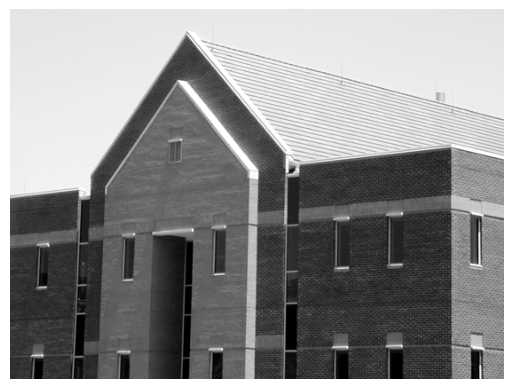

In [18]:
# wczytanie obrazu
dom = cv2.imread('dom.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(dom, 'gray', vmin=0, vmax=256)
plt.axis('off')

(-0.5, 556.5, 416.5, -0.5)

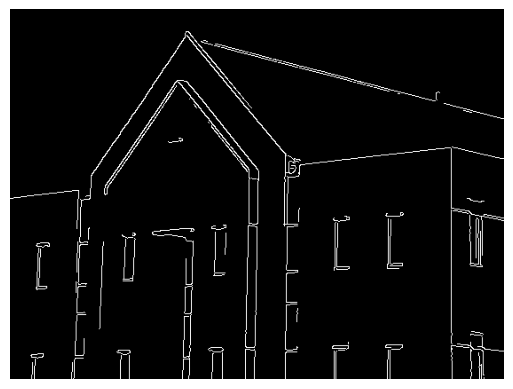

In [19]:
# detekcja krawędzi
domBlur = cv2.GaussianBlur(dom, (3, 3), 0)
domEdges = cv2.Canny(domBlur, 140, 200, None, 3, 1)

# wyświetlmy obraz po detekcji krawędzi
plt.imshow(domEdges, 'gray')
plt.axis('off')

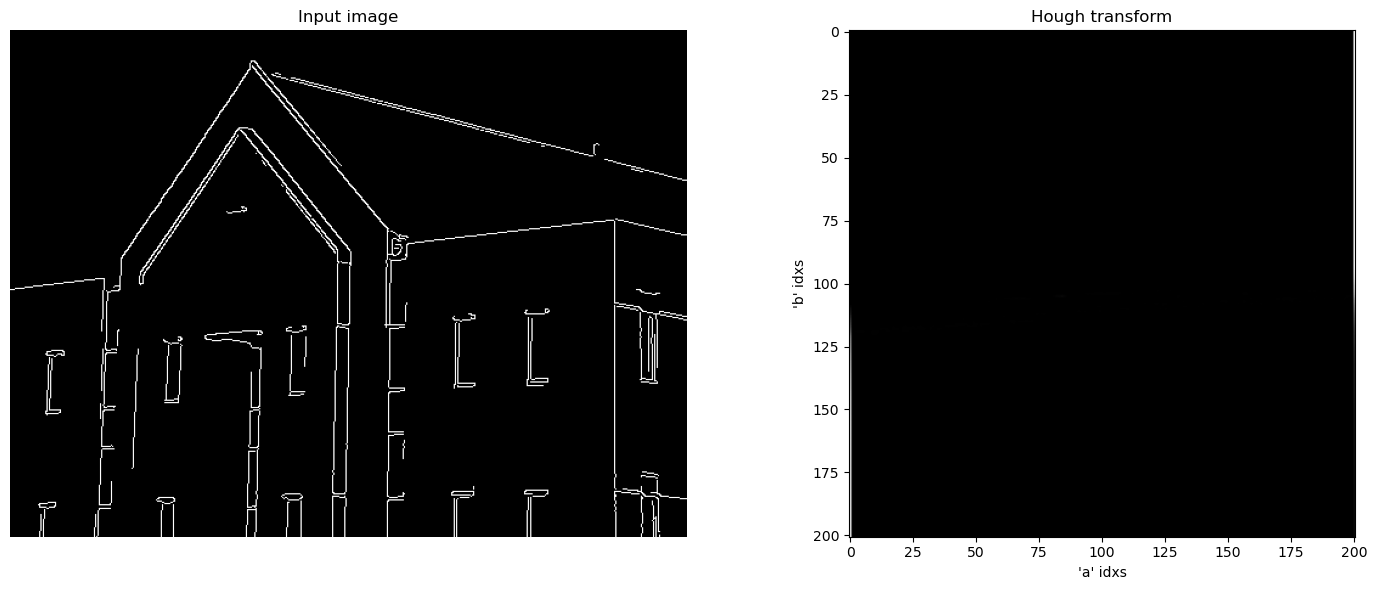

In [20]:
# transformata Hougha obrazu
H = hough_ab(domEdges, aMin, aMax, aStep, bMin, bMax, bStep)

# wyświetlmy wyniki
show_hough_ab(H, domEdges)


---

#### Zastanów się, w przypadku jakich prostych reprezentacja _ab_ nie sprawdzi się.

Wydaje mi się, że ta reprezentacja nie sprawdzi się (będzie miała problemy) w przypadku prostych "pionowych", tzn. równoległych do osi OY - nie mają one reprezentacji w postaci równania _y = ax + b_. Na testowanych obrazach (poza początkową sekcją) znajduje się dużo takich linii, więc może z tego powodu (dochodzi też kwestia doboru parametrów) wyniki nie są satysfakcjonujące.

---
